In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn import tree

In [4]:
# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 15)

#load data
full_data = pd.read_csv('data.csv', delimiter=',')
print(full_data.shape)
full_data.head()

(1721, 14)


,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone,Class
0,1914,1592.7200,23.26,2.5,11.6113,25523,99000,0,0,0,0,1,0,Churned
1,2073,1404.1496,174.45,27.5,2531.7246,14584,77299,0,0,1,0,0,1,Churned
2,3139,85.5504,14.34,5.0,29133.0557,477,4194,0,0,0,0,0,0,Churned
3,139,2315.2292,19.25,52.5,267441.2813,50316,52400,0,0,0,0,0,1,Active
4,143,973.9664,21.86,22.5,920871.0674,4032,15476,1,1,1,0,0,1,Active


In [9]:
# check for missing values
print(full_data.shape)
full_data.isnull().sum()
print(full_data.shape)
full_data['Class'].value_counts()

(1721, 14)
(1721, 14)


Churned    868
Active     853
Name: Class, dtype: int64

In [17]:
lista = ['Class']
full_data[lista] = full_data[lista].apply(lambda x:x.map({'Churned': 1, "Active": 0}))
full_data.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone,Class
0,1914,1592.7200,23.26,2.5,11.6113,25523,99000,0,0,0,0,1,0,1
1,2073,1404.1496,174.45,27.5,2531.7246,14584,77299,0,0,1,0,0,1,1
2,3139,85.5504,14.34,5.0,29133.0557,477,4194,0,0,0,0,0,0,1
3,139,2315.2292,19.25,52.5,267441.2813,50316,52400,0,0,0,0,0,1,0
4,143,973.9664,21.86,22.5,920871.0674,4032,15476,1,1,1,0,0,1,0


In [18]:
full_data.describe()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone,Class
count,1716.000000,1716.000000,1716.000000,1716.000000,1.716000e+03,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000
mean,1525.945804,927.135560,31.224341,60.982780,2.745236e+06,7341.386364,16574.594988,0.546620,0.561189,0.143939,0.225524,0.071678,0.614802,0.502914
std,1288.847125,1192.091729,56.462036,264.054504,8.930932e+06,16081.870140,34354.599824,0.497967,0.496386,0.351131,0.418049,0.258030,0.486784,0.500137
min,6.000000,4.910000,0.000000,0.000000,5.860000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,391.750000,256.214500,3.500000,1.250000,2.377156e+03,120.000000,1453.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.000000,640.685000,14.910000,13.750000,1.708650e+05,1976.500000,5079.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2301.000000,1236.817800,34.232500,53.750000,1.509876e+06,7882.500000,16222.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5451.000000,24438.830000,665.000000,8295.000000,1.550312e+08,381174.000000,431440.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
full_data = full_data[full_data['network_age']>=0]
print(full_data.shape)
full_data.isnull().sum()

(1716, 14)


network_age             0
Aggregate_Total_Rev     0
Aggregate_SMS_Rev       0
Aggregate_Data_Rev      0
Aggregate_Data_Vol      0
Aggregate_ONNET_REV     0
Aggregate_OFFNET_REV    0
aug_user_type_3G        0
sep_user_type_3G        0
aug_fav_a_mobilink      0
aug_fav_a_ufone         0
sep_fav_a_mobilink      0
sep_fav_a_ufone         0
Class                   0
dtype: int64

In [20]:
full_data.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone,Class
0,1914,1592.7200,23.26,2.5,11.6113,25523,99000,0,0,0,0,1,0,1
1,2073,1404.1496,174.45,27.5,2531.7246,14584,77299,0,0,1,0,0,1,1
2,3139,85.5504,14.34,5.0,29133.0557,477,4194,0,0,0,0,0,0,1
3,139,2315.2292,19.25,52.5,267441.2813,50316,52400,0,0,0,0,0,1,0
4,143,973.9664,21.86,22.5,920871.0674,4032,15476,1,1,1,0,0,1,0


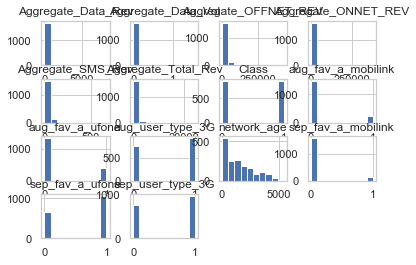

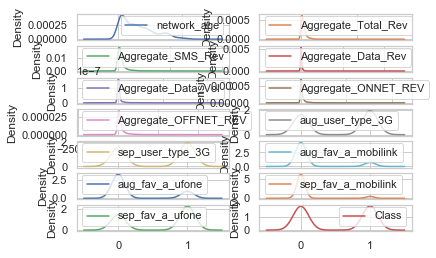

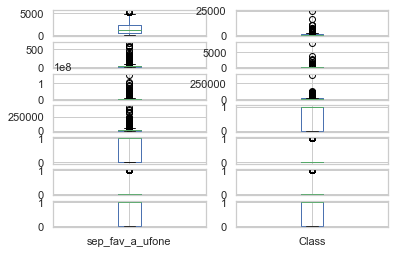

In [21]:
data = full_data
data.hist()#histograms - biểu đồ
plt.show()
data.plot(kind='density', subplots=True, layout=(7,2), sharex=False) #Density Plots
plt.show()
data.plot(kind='box', subplots=True, layout=(7,2), sharex=False, sharey=False) #Box and Whisker Plots
plt.show()

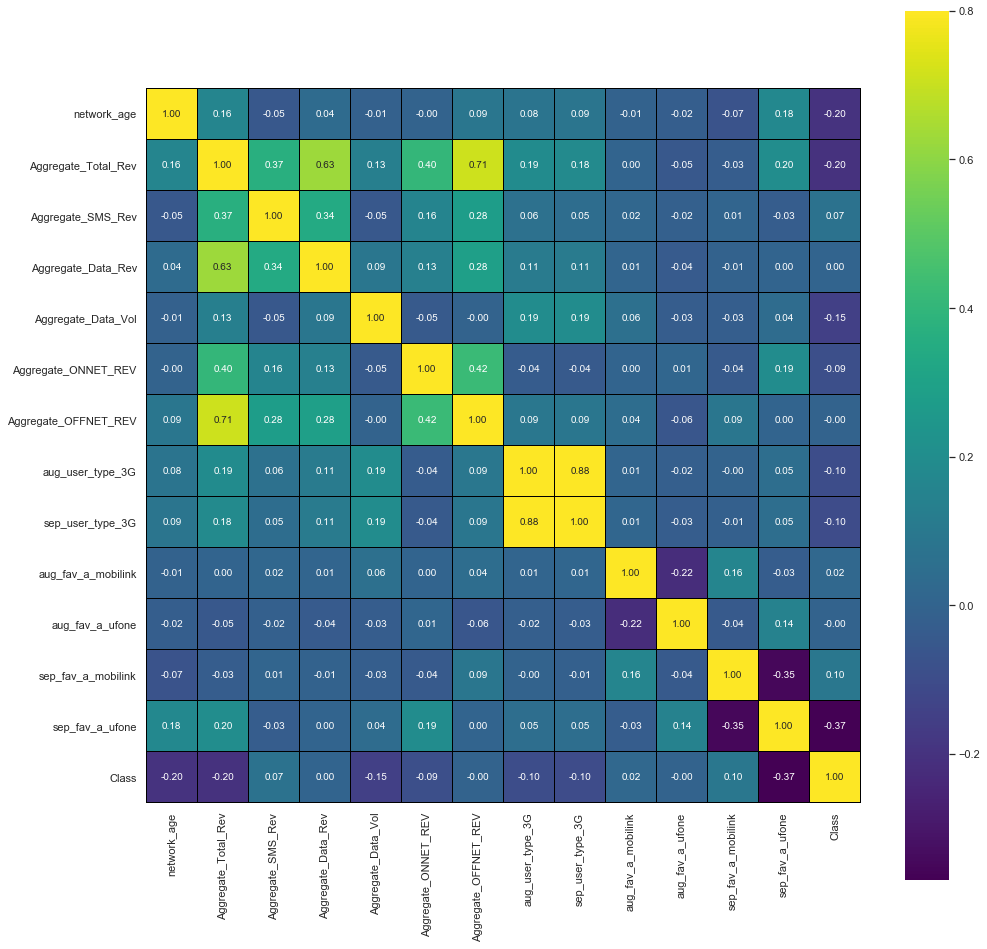

In [22]:
colormap = plt.cm.viridis
cor = full_data.corr()
#cor = cor.drop(['Class'],axis=1).drop(['Class'],axis=0)
plt.figure(figsize=(16,16))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='black',linewidths=0.1)

In [23]:
X = full_data.drop('Class', axis=1)
y = full_data['Class']

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = model.predict(X_test)
#y_pred = rdf.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 
#print(accuracy_score(pd.DataFrame(decision_tree.predict(y_test,y_pred))
print (report)

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0     0.6484    0.7882    0.7115       255
           1     0.7366    0.5808    0.6495       260

    accuracy                         0.6835       515
   macro avg     0.6925    0.6845    0.6805       515
weighted avg     0.6929    0.6835    0.6802       515

[[201  54]
 [109 151]]


In [48]:
model = DecisionTreeClassifier(max_depth = 5, criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 
print (report)

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0     0.6904    0.7608    0.7239       255
           1     0.7393    0.6654    0.7004       260

    accuracy                         0.7126       515
   macro avg     0.7149    0.7131    0.7121       515
weighted avg     0.7151    0.7126    0.7120       515

[[194  61]
 [ 87 173]]


In [53]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#y_pred = rdf.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 
#print(accuracy_score(pd.DataFrame(decision_tree.predict(y_test,y_pred))
print (report)

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0     0.6273    0.8118    0.7077       255
           1     0.7405    0.5269    0.6157       260

    accuracy                         0.6680       515
   macro avg     0.6839    0.6693    0.6617       515
weighted avg     0.6845    0.6680    0.6613       515

[[207  48]
 [123 137]]


In [71]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#y_pred = rdf.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 
#print(accuracy_score(pd.DataFrame(decision_tree.predict(y_test,y_pred))
print (report)

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)
w = model.coef_
b = model.intercept_
print('w = ', w)
print('b = ', b)

              precision    recall  f1-score   support

           0     0.6347    0.8039    0.7093       255
           1     0.7396    0.5462    0.6283       260

    accuracy                         0.6738       515
   macro avg     0.6871    0.6750    0.6688       515
weighted avg     0.6876    0.6738    0.6684       515

[[205  50]
 [118 142]]
w =  [[-0.01796758 -0.7341775   0.08062153  0.4926099  -0.08984583  0.00711815
   0.21398784  0.00336455 -0.00246547  0.00222126  0.00473643 -0.00280223
  -1.97463838]]
b =  [1.00505503]


In [41]:
model = KNeighborsClassifier(n_neighbors = 30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#y_pred = rdf.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 
#print(accuracy_score(pd.DataFrame(decision_tree.predict(y_test,y_pred))
print (report)

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0     0.6557    0.7020    0.6780       255
           1     0.6860    0.6385    0.6614       260

    accuracy                         0.6699       515
   macro avg     0.6708    0.6702    0.6697       515
weighted avg     0.6710    0.6699    0.6696       515

[[179  76]
 [ 94 166]]


In [42]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#y_pred = rdf.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 
#print(accuracy_score(pd.DataFrame(decision_tree.predict(y_test,y_pred))
print (report)

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0     0.6091    0.7882    0.6872       255
           1     0.7081    0.5038    0.5888       260

    accuracy                         0.6447       515
   macro avg     0.6586    0.6460    0.6380       515
weighted avg     0.6591    0.6447    0.6375       515

[[201  54]
 [129 131]]


(12,)
